# Avant de programmer :

- On importe les bibliothéques
- On définit les routines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.integrate import odeint 
%matplotlib inline

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def solution(F,Init,tinit,tmin,tmax,nbpas=200,args=()):
    if(tmin==tinit):
        tmoins=np.array([tinit])
        Solmoins=np.array([Init])
    else:
        tmoins=np.linspace(tinit,tmin,nbpas,dtype=np.float32)
        Solmoins=odeint(F,Init,tmoins,args)

    if(tmax==tinit):
        tplus=np.array([tinit])
        Solplus=np.array([Init])
    else:
        tplus=np.linspace(tinit,tmax,nbpas,dtype=np.float32)
        Solplus=odeint(F,Init,tplus,args)

    t=np.concatenate((tmoins[::-1],tplus),axis=0)
    Sol=np.concatenate((Solmoins[::-1],Solplus),axis=0)
    return t, Sol.T

def norme(a,b):
    return sqrt(a*a+b*b)+0.000001 #on empeche la norme de devenir nulle

def carquois(F,xmin,xmax,ymin,ymax,nbpas=30j,args=()):
    Y,X=np.mgrid[ymin:ymax:nbpas,xmin:xmax:nbpas]
    if args==():
         U,V=np.float32(np.apply_along_axis(F,0,np.asarray([X,Y]),0))
    else:
        U,V=np.float32(np.apply_along_axis(F,0,np.asarray([X,Y]),0,args))

    Un,Vn=U/np.float32(norme(U,V)), np.float32(V/norme(U,V))   
    quiver(X,Y,Un,Vn,
        norme(U,V),                # couleur liee a la vitesse
        cmap=cm.winter,pivot='middle',linewidth=0.1)
    plt.xlim(xmin,ymax)
    plt.ylim(ymin,ymax)
    del X,Y,U,V,Un,Vn

def flux(F,xmin,xmax,ymin,ymax,nbpas=30j,densite=2,epaisseur=2,args=()):
    Y,X=np.mgrid[ymin:ymax:nbpas,xmin:xmax:nbpas]
    if args==():
        U,V=np.float32(np.apply_along_axis(F,0,np.asarray([X,Y]),0))
    else:
        U,V=np.float32(np.apply_along_axis(F,0,np.asarray([X,Y]),0,args))
    vitesse=np.float32(norme(U,V))
    vitesse=vitesse/vitesse.max()
    plt.streamplot(X,Y,U,V,
               color=vitesse,
               linewidth=epaisseur,
               cmap=plt.cm.winter,
               density=densite)
    plt.xlim(xmin,ymax)
    plt.ylim(ymin,ymax)
    del X,Y,U,V,vitesse

# Systèmes d'équations différentielles linéaires

## 1. Le premier système

Commençons par étudier le système :
$$\begin{cases}
    x'&= \ 3x-2y\\
    y'&= \ 2x-2y
\end{cases}$$

Ce que l'on peut écrire sous la forme :
$$X'=F(X)\qquad\text{avec}\qquad X=\begin{bmatrix}x\\y\end{bmatrix}
\quad\text{ et }\quad
F(x) = AX
\quad\text{ o\`u }\quad
A = \begin{bmatrix}3&-2\\2&-2\end{bmatrix} $$

### 1.1 La fonction associée 

On commence par définir la fonction associée 

In [2]:
def F (X,t):
    return 3*X[0]-2*X[1],2*X[0]-2*X[1]


# solution unique olmasi icin condition initial ekliyoruz.
# hepsini çizdiremeyiz!
# à t0, il passe x0,y0 

### 1.2 Le champ de vecteurs associé

On représente le champ de vecteurs associé à cette équation avec la fonction **carquois** (qui veut dire *sandak/okluk* ).

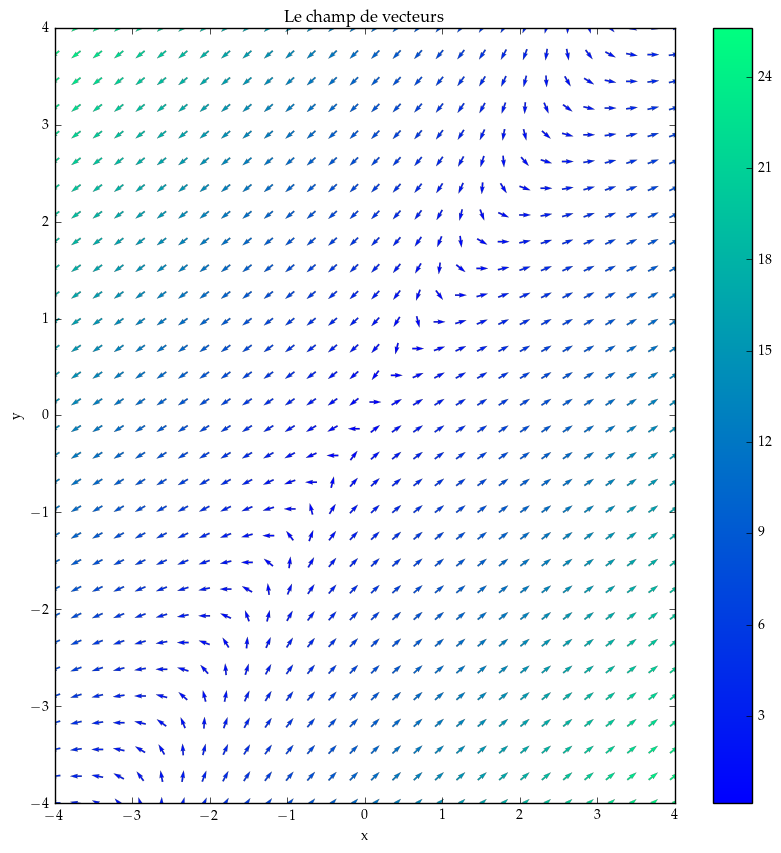

In [3]:
#taille de la figure
plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Le champ de vecteurs')

# Pas besoin dans ce cas de précise xlim et ylim : ils sont fixés dans carquois

carquois(F,-4,4,-4,4)

plt.colorbar()

### 1.3 Ajout de solutions approchées

On va ajoute une solution approchée de l'équation en utilisant la routine **solution**

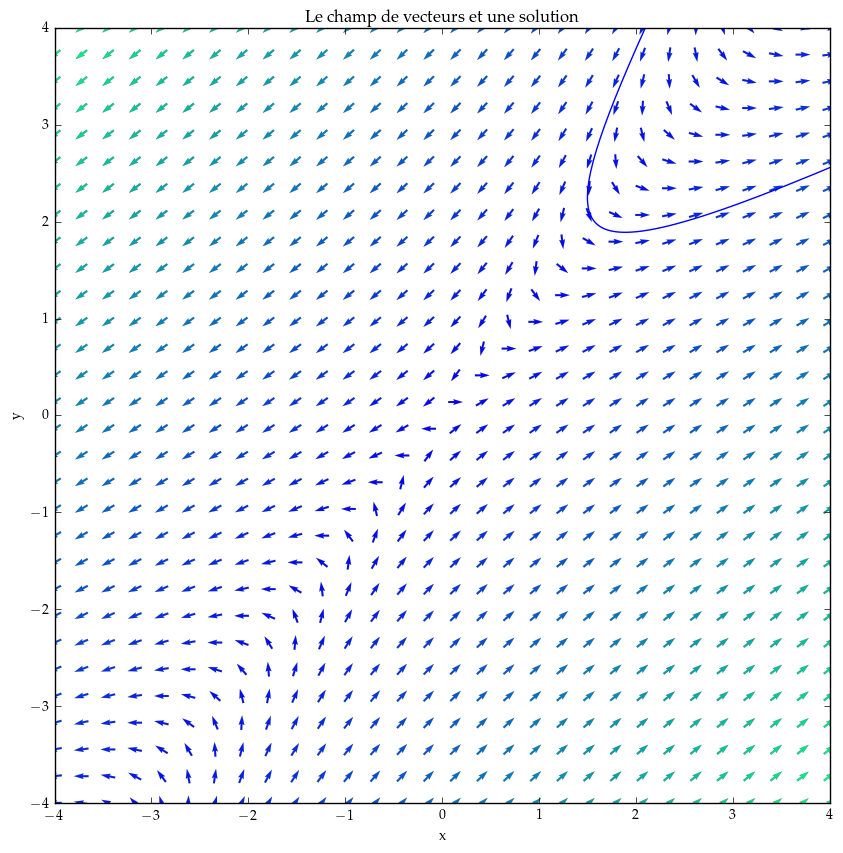

In [4]:
# mise en place de la figure
plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Le champ de vecteurs et une solution')

# resolution
t,[x,y]=solution(F,[2.5,2],0,-5,5)

# on dessine *x(t)* et *y(t)* sous forme d'une courbe paramétrée
plt.plot(x,y)

carquois(F,-4,4,-4,4)

**Exercice :** Modifier le programme précédent pour qu'il affiche $x$ en fonction du temps, puis $y$ en fonction du temps.

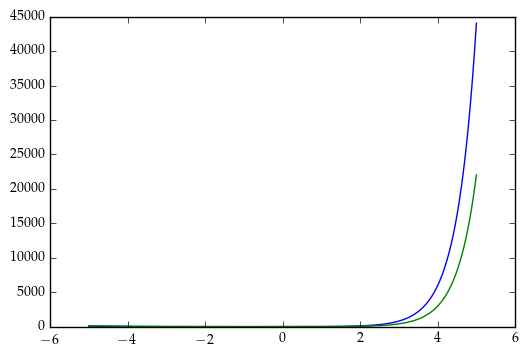

In [5]:
# resolution
t,[x,y]=solution(F,[2.5,2],0,-5,5)

# on dessine *x(t)* et *y(t)* sous forme d'une courbe paramétrée
plt.plot(t,x)
plt.plot(t,y)

#carquois(F,-4,4,-4,4)

**Exercice :** Modifier le programme pour afficher les fonctions $x(t)$ et $y(t)$ sur un intervalle plus adapté

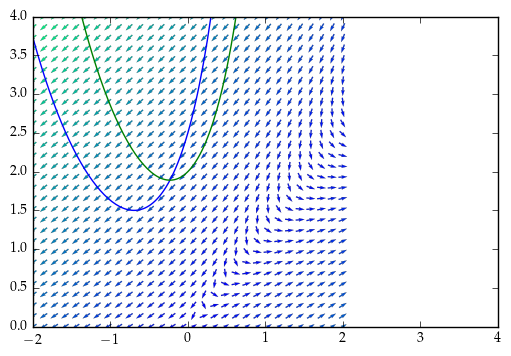

In [6]:
# resolution
t,[x,y]=solution(F,[2.5,2],0,-5,5)

# on dessine *x(t)* et *y(t)* sous forme d'une courbe paramétrée
plt.plot(t,x)
plt.plot(t,y)

carquois(F,-2,2,0,4)

### 1.4 Affichage d'une série de solution

    **Exercise :** Utiliser une boucle **for** pour afficher 

- le champ de vecteurs et 
- la famille de solutions vérifiant 
$X(0) = (2, i) \ \text{ pour 5 valeurs de } \ i \in [0,5]$

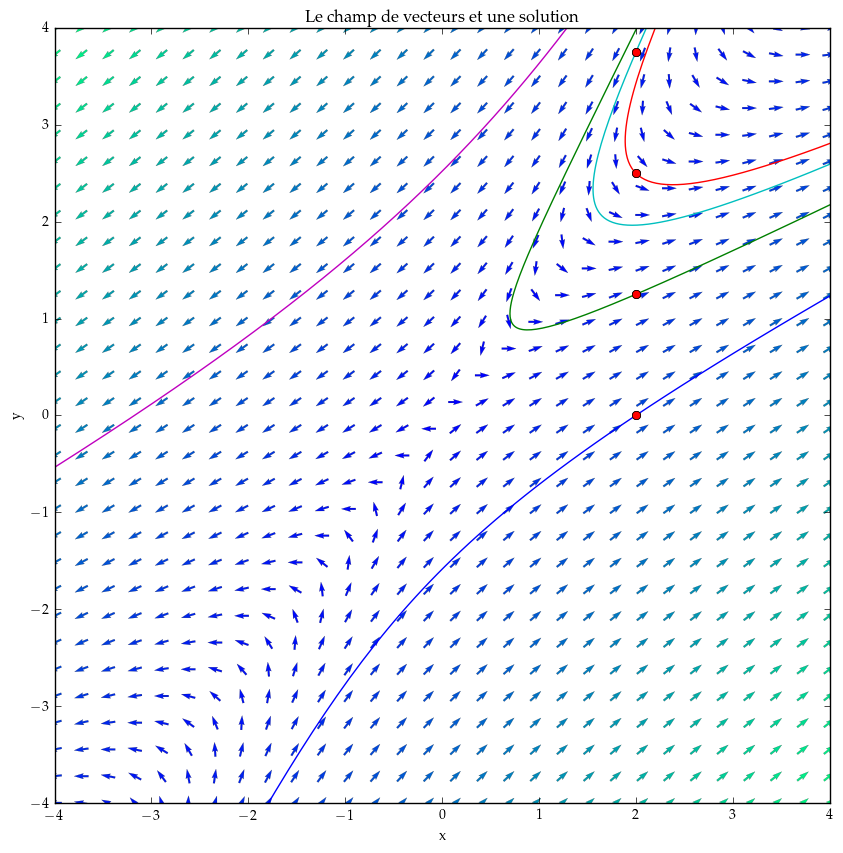

In [7]:

# mise en place de la figure
plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Le champ de vecteurs et une solution')



for i in np.linspace(0,5,5): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    t,[x,y]=solution(F,[2,i],0,-5,5)
    plt.plot(x,y)
    t,[x,y]=solution(F,[2,i],0,0,0)
    plt.plot(x,y,'ro')

carquois(F,-4,4,-4,4)



**Question :** 

 - Pourquoi obtient-on une trajectoire rectiligne ?
 - Pourquoi n'obtient-on qu'une demi-droite ?

**Exercise :**

- Compléter le programme pour obtenir *tous les types* de solutions possibles

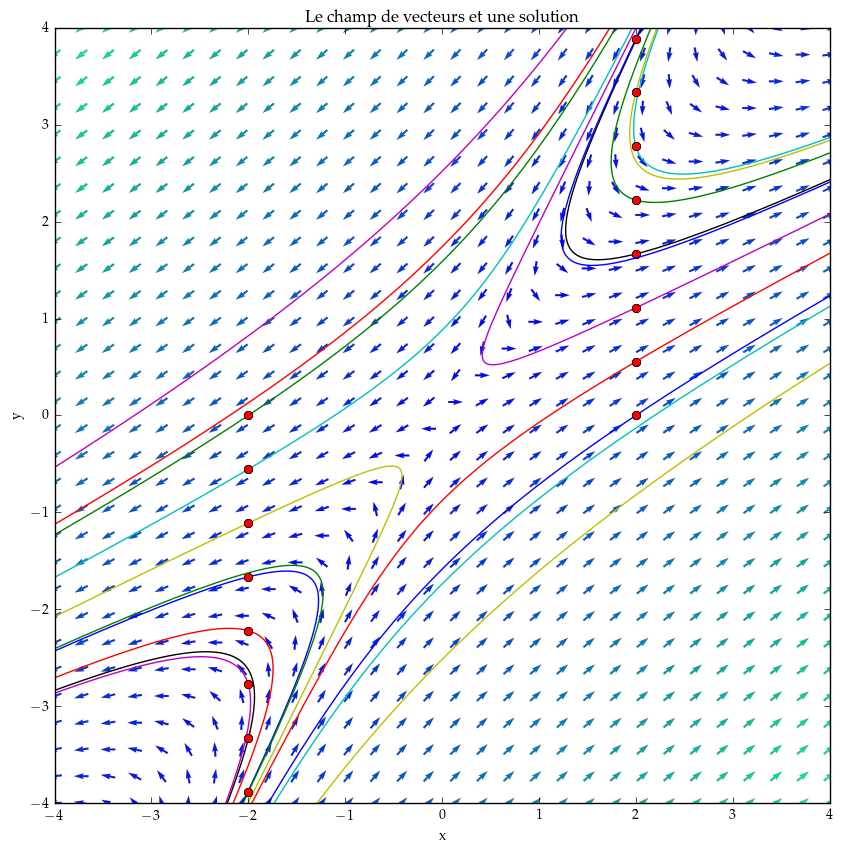

In [14]:

# mise en place de la figure
plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Le champ de vecteurs et une solution')

for i in np.linspace(0,5,10): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    t,[x,y]=solution(F,[2,i],0,-5,5)
    plt.plot(x,y)
    t,[x,y]=solution(F,[2,i],0,0,0)
    plt.plot(x,y,'ro')
    t,[x,y]=solution(F,[-2,-i],0,-5,5)
    plt.plot(x,y)
    t,[x,y]=solution(F,[-2,-i],0,0,0)
    plt.plot(x,y,'ro')
    
carquois(F,-4,4,-4,4)


### 1.5 Ajout des espaces propres et des tangentes particulières

**Exercice :** Sur un même dessin, représenter :

- le champ de vecteur
- les espaces propres de $A$
- les points où :
  - $x'=0$
  - $y'=0$

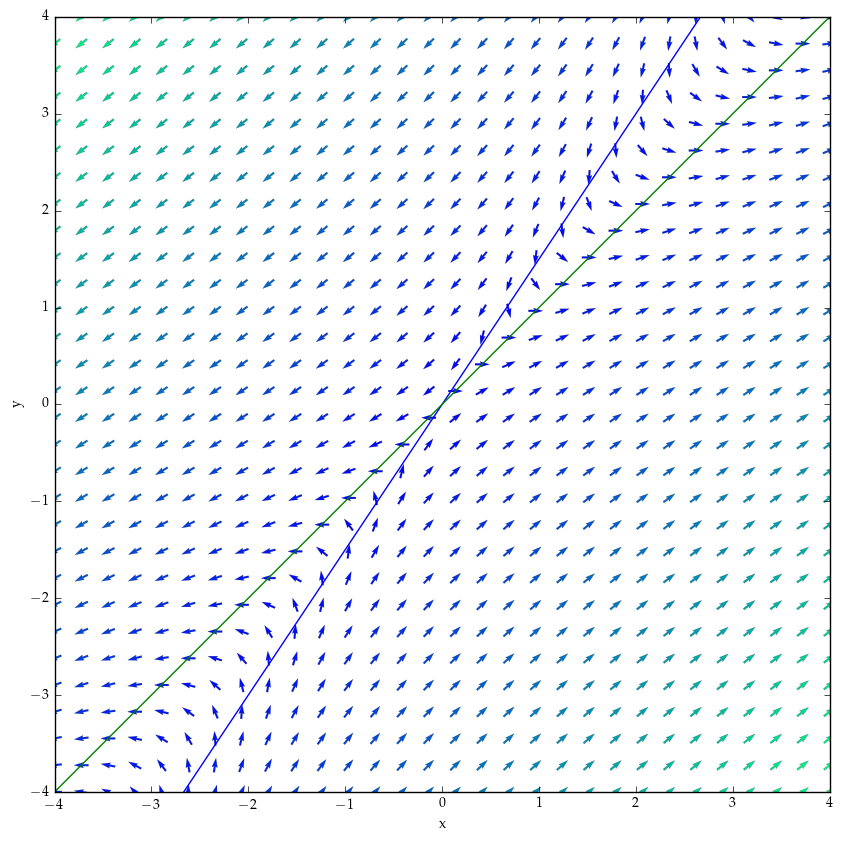

In [40]:

# mise en place de la figure
plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
x=[-10,10]
y=[-15,15]

plt.plot(x,y)

x=[-10,10]
y=[-10,10]

plt.plot(x,y)

carquois(F,-4,4,-4,4)

**Exercice** Que faut-il écrire pour obtenir la figure suivante ?

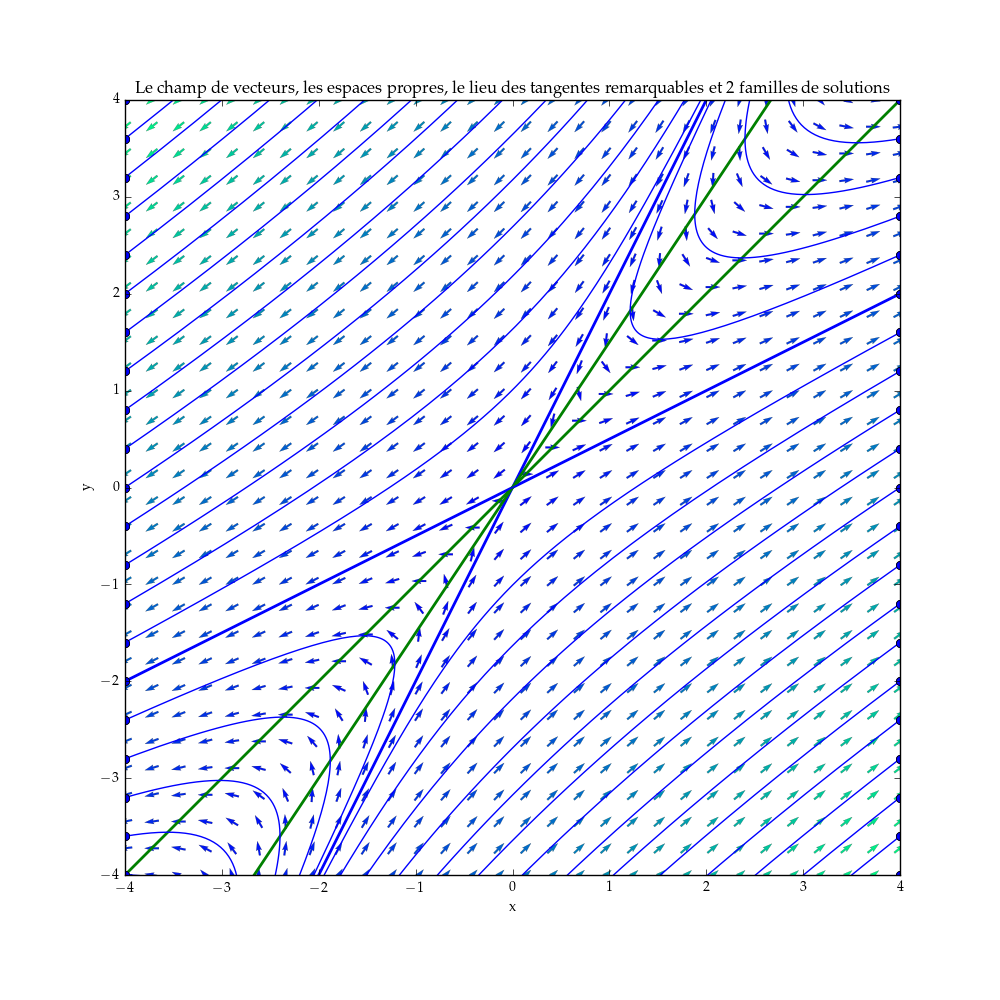

In [10]:
from IPython.display import Image
Image(filename="TP2_2018_fig1.png",width=800,height=800)

##  2. Deuxième problème : ajout d'un paramètre

Soit $a$ un paramètre réel. On va étudier les solutions du système :
$$\left\{\begin{array}{ccr}
    x'&=& x + (a-1)y\\
    y'&=&-x + (a+1)y
\end{array}\right.$$

La fonction qui va servir pour la suite est donc définie par :

In [11]:
def G(X,t,a):
    return X[0]+(a-1)*X[1],-X[0]+(a+1)*X[1]

ou, de façon équivalente :

In [12]:
def G(X,t,a):
    [x,y]=X
    return x+(a-1)*y,-x+(a+1)*y

On va maintenant utiliser **solution** en transmettant le paramètre :

**ATTENTION A LA VIRGULE SUPPLEMENTAIRE dans les paramètres**

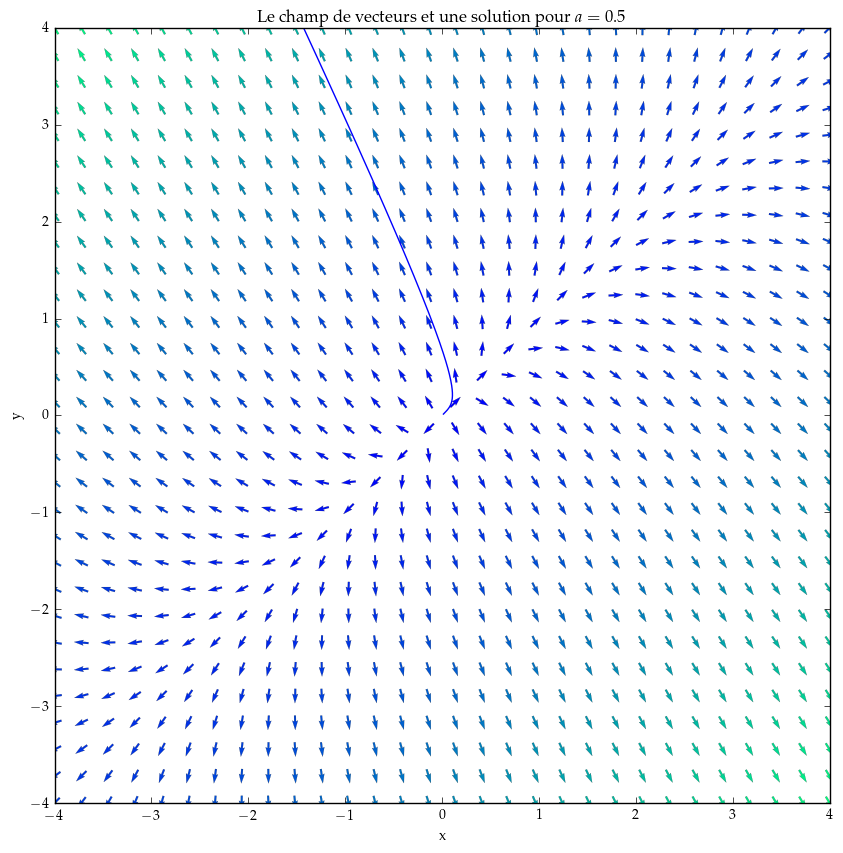

In [43]:
plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Le champ de vecteurs et une solution pour $a=0.5$')

# dans "solution", on utilise une virgule
t,[x,y]=solution(G,[0.1,0.3],0,-5,5,args=(0.5,))
plot(x,y,'b')

# mais pas de virgule dans "carquois"
carquois(G,-4,4,-4,4,args=(0.5))

**Exercice :** Utiliser ce qui a été vu précédemment pour tracer :

* le champ de vecteur

* les espaces propres

* le lieu des tangentes verticales et des tangentes horizontales 

* la famille des solutions avec des conditions initiales régulièrement espacées sur les axes $Ox$ et $Oy$. 

dans les cas :

* $a=1$

* $a=-2$ 

* $a=2$ 

* $a=4$ 


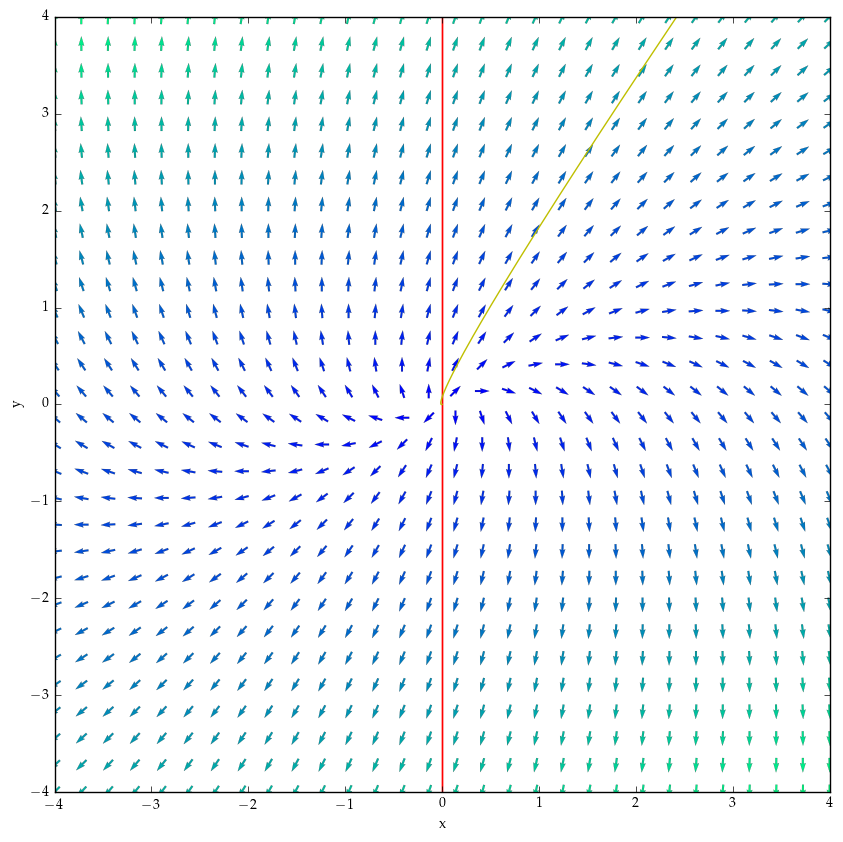

In [52]:
# mise en place de la figure
plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
x=[0,0]
y=[-100,100]
plt.plot(x,y,'red')

x=[0,0]
y=[-100,100]
plt.plot(x,y,'red')

#le champ de vecteur
#les espaces propres
#le lieu des tangentes verticales et des tangentes horizontales
#la famille des solutions avec des conditions initiales régulièrement espacées sur les axes  Ox  et  Oy .




# dans "solution", on utilise une virgule
t,[x,y]=solution(G,[0.1,0.3],0,-5,5,args=(2,))
plot(x,y,'y')

# mais pas de virgule dans "carquois"
carquois(G,-4,4,-4,4,args=(2))




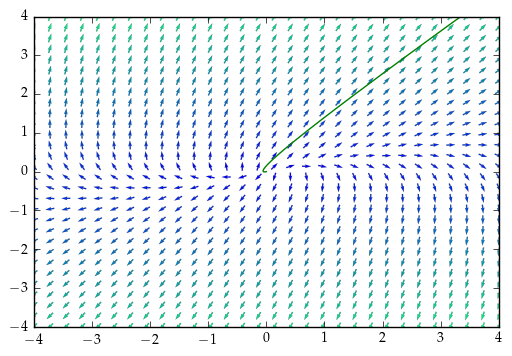

In [49]:

# dans "solution", on utilise une virgule
t,[x,y]=solution(G,[0.1,0.3],0,-5,5,args=(4,))
plot(x,y,'g')

# mais pas de virgule dans "carquois"
carquois(G,-4,4,-4,4,args=(4))

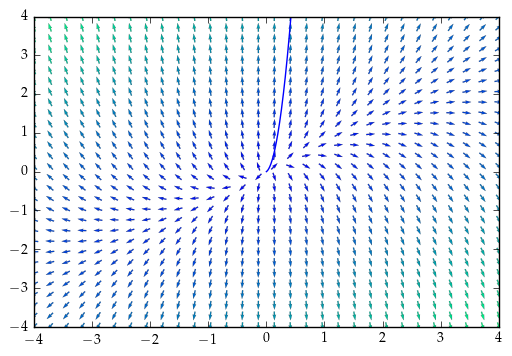

In [50]:

# dans "solution", on utilise une virgule
t,[x,y]=solution(G,[0.1,0.3],0,-5,5,args=(1,))
plot(x,y,'b')

# mais pas de virgule dans "carquois"
carquois(G,-4,4,-4,4,args=(1))

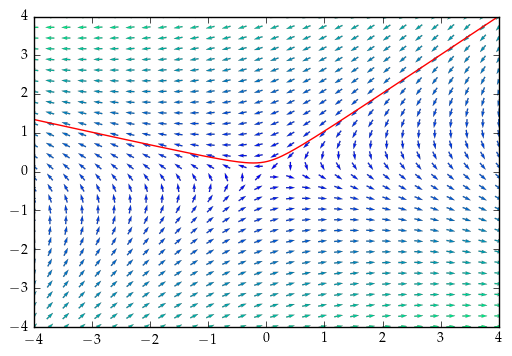

In [51]:
# dans "solution", on utilise une virgule
t,[x,y]=solution(G,[0.1,0.3],0,-5,5,args=(-2,))
plot(x,y,'r')

# mais pas de virgule dans "carquois"
carquois(G,-4,4,-4,4,args=(-2))
